<a href="https://colab.research.google.com/github/RofiqAulia/PCVK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection**

## **TUGAS PRAKTIKUM**
**1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.**

**2. Buka Google Colab, kemudian import folder yang ada di Drive Anda.**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

## **Konvolusi tanpa Library**
> **Membuat fungsi konvolusi**\
Fungsi konvolusi yang dibuat memiliki parameter berupa:
1. Citra masukan,
2. Kernel berupa matriks untuk memfilter citra,
3. Nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. Nilai pad yang akan ditambahkan pada citra.

In [3]:
import numpy as np

def convolution2d(image, kernel, stride=1, padding=0):
    # Memastikan gambar dalam format grayscale
    if len(image.shape) != 2:
        raise ValueError("Gambar harus dalam format grayscale.")

    # Menambahkan padding ke gambar
    padded_image = np.pad(image, pad_width=padding, mode='constant', constant_values=0)

    # Menentukan ukuran output
    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = padded_image.shape

    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    # Inisialisasi image_result
    image_result = np.zeros((output_height, output_width)).astype(np.float32)

    # Melakukan operasi konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Ambil bagian gambar yang akan dikonvolusi
            region = padded_image[y * stride:y * stride + kernel_height,
                                  x * stride:x * stride + kernel_width]
            # Melakukan konvolusi (dot product) antara region dan kernel
            image_result[y, x] = np.sum(region * kernel).astype(np.float32)

    return image_result

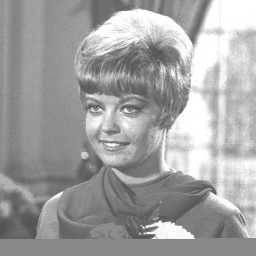

In [4]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/Images/girl.jpg')
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cv2_imshow(img1_gray)

### **Sharpen**
Teknik untuk menajamkan citra.

In [5]:
sharpen_kernel = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0],
    ]
)

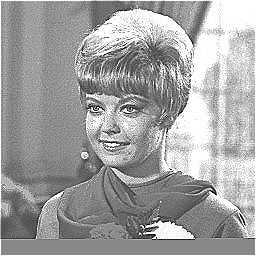

In [6]:
sharpen_image = convolution2d(img1_gray, sharpen_kernel, padding=1)
cv2_imshow(sharpen_image)

### **Emboss**
Teknik untuk menghasilkan efek timbul pada citra.

In [7]:
emboss_kernel = np.array(
    [
        [-2,-1, 0],
        [-1, 1, 1],
        [ 0, 1, 2]
    ]
)

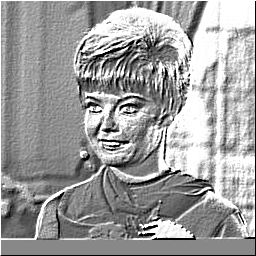

In [8]:
emboss_image = convolution2d(img1_gray, emboss_kernel, padding=1)
cv2_imshow(emboss_image)

### **Edge Detection**
Untuk mengetahui garis-garis yang membentuk objek.

**Left Sobel Edge Detection**

In [9]:
left_sobel_kernel = np.array(
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
  )

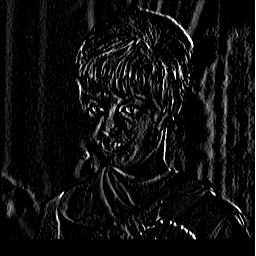

In [10]:
edge_detection_img = convolution2d(img1_gray, left_sobel_kernel, padding=1)
cv2_imshow(edge_detection_img)

**Canny Edge Detection**

In [11]:
canny_edge_kernel = np.array(
    [
        [-1,-1,-1],
        [-1, 8,-1],
        [-1,-1,-1]
    ]
)

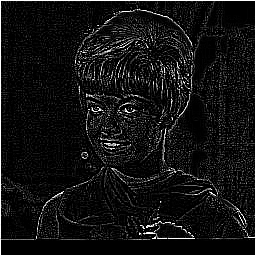

In [12]:
canny_edge_detection_img = convolution2d(img1_gray, canny_edge_kernel, padding=1)
cv2_imshow(canny_edge_detection_img)

**Prewit Edge Detection**

In [13]:
prewit_edge_kernel = np.array(
    [
        [-1,-1,-1],
        [ 0, 0, 0],
        [ 1, 1, 1]
    ]
)

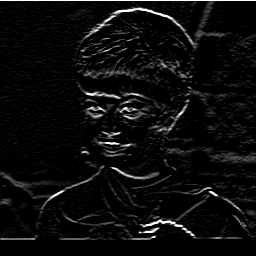

In [14]:
prewit_edge_detection_img = convolution2d(img1_gray, prewit_edge_kernel, padding=1)
cv2_imshow(prewit_edge_detection_img)

### **Gaussian Blur**
Untuk mengurangi noise atau gangguan pada gambar dan juga untuk membuat gambar menjadi lebih halus.

**5x5 | Gaussian Blur**

In [15]:
gaussian_blur_55 = np.array(
    [
        [1/256, 4/256, 6/256, 4/256, 1/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [6/256, 24/256, 36/256, 24/256, 6/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [1/256, 4/256, 6/256, 4/256, 1/256]
    ]
)

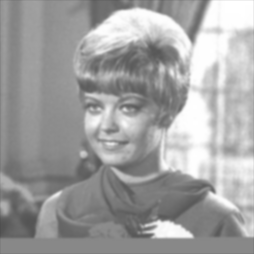

In [16]:
gaussian_blur_img = convolution2d(img1_gray, gaussian_blur_55, padding=1)
cv2_imshow(gaussian_blur_img)

**21x21 | Gaussian Blur**

In [17]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gaussian = gaussian_kernel @ gaussian_kernel.transpose()

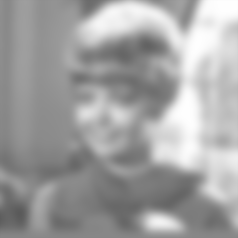

In [18]:
gaussian_blur_21_img = convolution2d(img1_gray, kernel_gaussian, padding=1)
cv2_imshow(gaussian_blur_21_img)